In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from keras.layers import Lambda, Input, Dense, Dropout
from keras.models import Model
#from keras import backend as K
#from keras import regularizers
from pandas.plotting import scatter_matrix
#import argparse
#import os
from keras.losses import mse#, binary_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping

%matplotlib inline

Using TensorFlow backend.


In [2]:
df_atmes = pd.read_csv("americanToadPadraoMes.csv")
#df_gfmes = pd.read_csv("greenFrogPadraoMes.csv")
#df_spmes = pd.read_csv("springPeeperPadraoMes.csv")
#df_atest = pd.read_csv("americanToadPadraoEstacao.csv")
#df_gfest = pd.read_csv("greenFrogPadraoEstacao.csv")
#df_spest = pd.read_csv("springPeeperPadraoEstacao.csv")

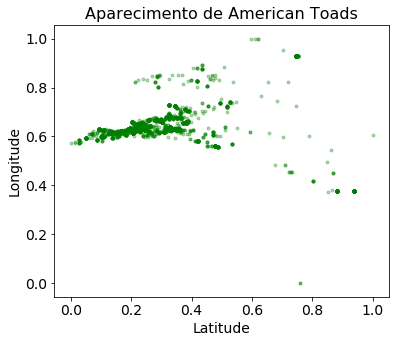

In [3]:
plt.figure(figsize=(6,5))
plt.rc('font',size=14)
plt.rc('axes',titlesize=16)
plt.scatter(df_atmes["lat"], df_atmes["lng"],marker=".",alpha='0.3',color="green")
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.title("Aparecimento de American Toads")
plt.show()

# Autoencoder

In [4]:
df_atmes.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
input_dim = len(df_atmes.columns)
input_dim

28

In [6]:
# Rede com duas camadas decodificadas e batch_normalizzation e Tanh
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
batch1 = BatchNormalization()(entrada)
encoded1 = Dense(encoding_dim1,activation="tanh")(batch1)
dp2 = Dropout(0.2)(encoded1) 
# Tentar com 30%
encoded2 = Dense(encoding_dim1,activation="tanh")(dp2)
batch2 = BatchNormalization()(encoded2)
decoded = Dense(input_dim,activation="sigmoid")(batch2)

In [7]:
# Cria o modelo para a rede anteriormente montada
autoencoder = Model(entrada,decoded)

In [8]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
autoencoder.compile(optimizer='adam', loss='mse')

In [9]:
# Separa as base de treino e teste
X_trainAtMes, X_testAtMes = train_test_split(df_atmes, test_size=0.30, random_state=42)

In [10]:
batch = len(df_atmes)//10
batch

367

In [11]:
attest_dim = len(X_testAtMes)//10
attest_dim

110

In [12]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100,
                   baseline=0.17, restore_best_weights=True)
history = autoencoder.fit(X_trainAtMes, X_trainAtMes,
                epochs=10000,
                batch_size=batch,
                shuffle=True,
                validation_data=(X_testAtMes, X_testAtMes),
                callbacks=[es])

Train on 2572 samples, validate on 1103 samples
Epoch 1/10000
2572/2572 [==============================] - 2s 767us/step - loss: 0.1464 - val_loss: 0.1384
Epoch 2/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.1394 - val_loss: 0.1331
Epoch 3/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.1337 - val_loss: 0.1267
Epoch 4/10000
2572/2572 [==============================] - 0s 14us/step - loss: 0.1284 - val_loss: 0.1217
Epoch 5/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.1237 - val_loss: 0.1166
Epoch 6/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.1193 - val_loss: 0.1123
Epoch 7/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.1153 - val_loss: 0.1086
Epoch 8/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.1116 - val_loss: 0.1052
Epoch 9/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.1080 - val_loss: 0.10

2572/2572 [==============================] - 0s 15us/step - loss: 0.0101 - val_loss: 0.0083
Epoch 78/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0101 - val_loss: 0.0082
Epoch 79/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0099 - val_loss: 0.0081
Epoch 80/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0098 - val_loss: 0.0080
Epoch 81/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0097 - val_loss: 0.0079
Epoch 82/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0096 - val_loss: 0.0078
Epoch 83/10000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0096 - val_loss: 0.0077
Epoch 84/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0094 - val_loss: 0.0076
Epoch 85/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0094 - val_loss: 0.0075
Epoch 86/10000
2572/2572 [==========================

2572/2572 [==============================] - 0s 12us/step - loss: 0.0062 - val_loss: 0.0043
Epoch 154/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0062 - val_loss: 0.0042
Epoch 155/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0062 - val_loss: 0.0043
Epoch 156/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0062 - val_loss: 0.0042
Epoch 157/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0062 - val_loss: 0.0042
Epoch 158/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0062 - val_loss: 0.0042
Epoch 159/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0060 - val_loss: 0.0041
Epoch 160/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0060 - val_loss: 0.0041
Epoch 161/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0061 - val_loss: 0.0041
Epoch 162/10000
2572/2572 [=================

2572/2572 [==============================] - 0s 12us/step - loss: 0.0051 - val_loss: 0.0031
Epoch 230/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0050 - val_loss: 0.0031
Epoch 231/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0050 - val_loss: 0.0031
Epoch 232/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0051 - val_loss: 0.0031
Epoch 233/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0051 - val_loss: 0.0031
Epoch 234/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0051 - val_loss: 0.0031
Epoch 235/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0050 - val_loss: 0.0031
Epoch 236/10000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0050 - val_loss: 0.0031
Epoch 237/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0050 - val_loss: 0.0031
Epoch 238/10000
2572/2572 [=================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0047 - val_loss: 0.0027
Epoch 306/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0045 - val_loss: 0.0027
Epoch 307/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0046 - val_loss: 0.0026
Epoch 308/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0045 - val_loss: 0.0026
Epoch 309/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0046 - val_loss: 0.0026
Epoch 310/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0046 - val_loss: 0.0026
Epoch 311/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0046 - val_loss: 0.0026
Epoch 312/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0045 - val_loss: 0.0026
Epoch 313/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0046 - val_loss: 0.0026
Epoch 314/10000
2572/2572 [=================

2572/2572 [==============================] - 0s 12us/step - loss: 0.0042 - val_loss: 0.0024
Epoch 382/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0043 - val_loss: 0.0024
Epoch 383/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0043 - val_loss: 0.0024
Epoch 384/10000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0043 - val_loss: 0.0024
Epoch 385/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0043 - val_loss: 0.0024
Epoch 386/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0043 - val_loss: 0.0024
Epoch 387/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0043 - val_loss: 0.0024
Epoch 388/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0042 - val_loss: 0.0024
Epoch 389/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0043 - val_loss: 0.0024
Epoch 390/10000
2572/2572 [=================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0041 - val_loss: 0.0022
Epoch 458/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0041 - val_loss: 0.0022
Epoch 459/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0022
Epoch 460/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0042 - val_loss: 0.0025
Epoch 461/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 462/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0043 - val_loss: 0.0024
Epoch 463/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0043 - val_loss: 0.0023
Epoch 464/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0043 - val_loss: 0.0023
Epoch 465/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0043 - val_loss: 0.0023
Epoch 466/10000
2572/2572 [=================

2572/2572 [==============================] - 0s 14us/step - loss: 0.0040 - val_loss: 0.0021
Epoch 534/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0021
Epoch 535/10000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0039 - val_loss: 0.0021
Epoch 536/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0038 - val_loss: 0.0021
Epoch 537/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0021
Epoch 538/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0039 - val_loss: 0.0021
Epoch 539/10000
2572/2572 [==============================] - 0s 48us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 540/10000
2572/2572 [==============================] - 0s 31us/step - loss: 0.0041 - val_loss: 0.0021
Epoch 541/10000
2572/2572 [==============================] - 0s 27us/step - loss: 0.0040 - val_loss: 0.0021
Epoch 542/10000
2572/2572 [=================

Epoch 609/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 610/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 611/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 612/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 613/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 614/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 615/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 616/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 617/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 618/10000
2572/2572 [=

Epoch 685/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 686/10000
2572/2572 [==============================] - 0s 36us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 687/10000
2572/2572 [==============================] - 0s 39us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 688/10000
2572/2572 [==============================] - 0s 39us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 689/10000
2572/2572 [==============================] - 0s 28us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 690/10000
2572/2572 [==============================] - 0s 28us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 691/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 692/10000
2572/2572 [==============================] - ETA: 0s - loss: 0.003 - 0s 20us/step - loss: 0.0038 - val_loss: 0.0019
Epoch 693/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0036 - val_loss: 0.0019
Epoc

2572/2572 [==============================] - 0s 34us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 761/10000
2572/2572 [==============================] - 0s 28us/step - loss: 0.0039 - val_loss: 0.0021
Epoch 762/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0038 - val_loss: 0.0021
Epoch 763/10000
2572/2572 [==============================] - 0s 36us/step - loss: 0.0039 - val_loss: 0.0021
Epoch 764/10000
2572/2572 [==============================] - 0s 28us/step - loss: 0.0039 - val_loss: 0.0021
Epoch 765/10000
2572/2572 [==============================] - 0s 27us/step - loss: 0.0037 - val_loss: 0.0021
Epoch 766/10000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0038 - val_loss: 0.0021
Epoch 767/10000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0038 - val_loss: 0.0021
Epoch 768/10000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 769/10000
2572/2572 [=================

2572/2572 [==============================] - 0s 14us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 837/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0019
Epoch 838/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 839/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 840/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 841/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 842/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 843/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 844/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 845/10000
2572/2572 [=================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 913/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 914/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 915/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 916/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 917/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 918/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 919/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 920/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 921/10000
2572/2572 [=================

2572/2572 [==============================] - 0s 12us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 989/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 990/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 991/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 992/10000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 993/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 994/10000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 995/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 996/10000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 997/10000
2572/2572 [=================

2572/2572 [==============================] - 0s 18us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 1064/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 1065/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 1066/10000
2572/2572 [==============================] - 0s 30us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 1067/10000
2572/2572 [==============================] - 0s 28us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 1068/10000
2572/2572 [==============================] - 0s 37us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 1069/10000
2572/2572 [==============================] - 0s 33us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 1070/10000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 1071/10000
2572/2572 [==============================] - 0s 31us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 1072/10000
2572/2572 [========

2572/2572 [==============================] - 0s 31us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 1139/10000
2572/2572 [==============================] - 0s 28us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 1140/10000
2572/2572 [==============================] - 0s 35us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 1141/10000
2572/2572 [==============================] - 0s 28us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 1142/10000
2572/2572 [==============================] - 0s 37us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 1143/10000
2572/2572 [==============================] - 0s 27us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 1144/10000
2572/2572 [==============================] - 0s 33us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 1145/10000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 1146/10000
2572/2572 [==============================] - 0s 29us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 1147/10000
2572/2572 [========

2572/2572 [==============================] - 0s 22us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 1214/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 1215/10000
2572/2572 [==============================] - 0s 29us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 1216/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 1217/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 1218/10000
2572/2572 [==============================] - 0s 34us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 1219/10000
2572/2572 [==============================] - 0s 31us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 1220/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 1221/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 1222/10000
2572/2572 [========

2572/2572 [==============================] - 0s 13us/step - loss: 0.0034 - val_loss: 0.0016
Epoch 1289/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0035 - val_loss: 0.0015
Epoch 1290/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0035 - val_loss: 0.0015
Epoch 1291/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0035 - val_loss: 0.0016
Epoch 1292/10000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0034 - val_loss: 0.0016
Epoch 1293/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0034 - val_loss: 0.0016
Epoch 1294/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0034 - val_loss: 0.0016
Epoch 1295/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0035 - val_loss: 0.0016
Epoch 1296/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0034 - val_loss: 0.0016
Epoch 1297/10000
2572/2572 [========

2572/2572 [==============================] - 0s 12us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 1364/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0035 - val_loss: 0.0016
Epoch 1365/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 1366/10000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 1367/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0034 - val_loss: 0.0016
Epoch 1368/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0034 - val_loss: 0.0016
Epoch 1369/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0035 - val_loss: 0.0016
Epoch 1370/10000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0035 - val_loss: 0.0016
Epoch 1371/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0034 - val_loss: 0.0016
Epoch 1372/10000
2572/2572 [========

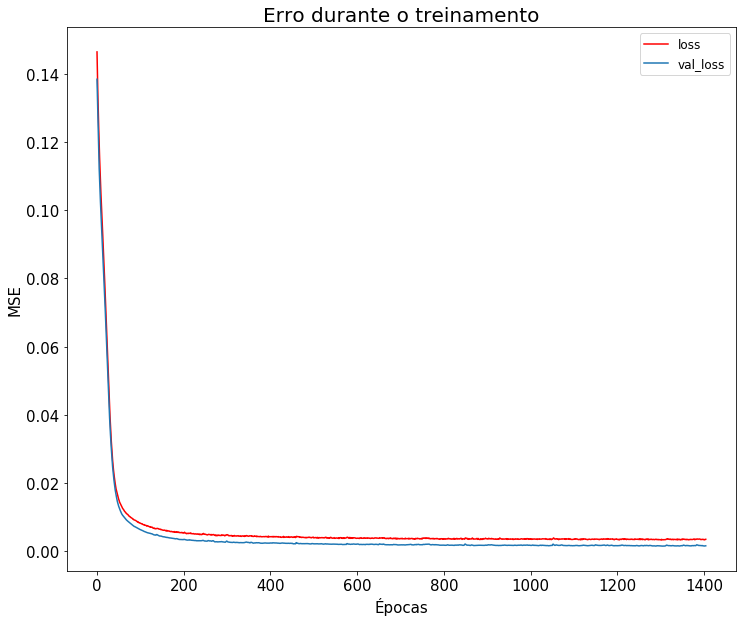

In [13]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=15)
plt.plot(history.history['loss'],color='r',label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Erro durante o treinamento")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [14]:
# Faz a previsão para a base de teste
testeAtMes = autoencoder.predict(X_testAtMes)

In [15]:
# Calcula o erro (MSE) para o teste
autoencoder.evaluate(x=X_testAtMes, y=X_testAtMes, batch_size=attest_dim)

1103/1103 [==============================] - 0s 10us/step


0.0015219686456731372

In [17]:
# Calcula o erro (MSE) para o treino
autoencoder.evaluate(x=X_trainAtMes, y=X_trainAtMes, batch_size=batch)

2572/2572 [==============================] - 0s 5us/step


0.0015379310966940802

# Feature Selection

In [16]:
def mean_squared_error(y_true, y_pred):
    return np.mean(np.square(y_pred - y_true))

In [18]:
# Calcula o erro (MSE) para o treino
scores = mean_squared_error(X_testAtMes, testeAtMes)
scores

date                 0.002031
lat                  0.002452
lng                  0.003359
thunder              0.000085
snow                 0.000039
minhumidity          0.002749
coolingdegreedays    0.001618
maxdewptm            0.001269
heatingdegreedays    0.001154
meanpressurem        0.001477
rain                 0.000364
minwspdm             0.003882
fog                  0.000175
humidity             0.002496
gdegreedays          0.002879
mindewptm            0.001272
minpressurem         0.001964
maxtempm             0.000931
meanwindspdm         0.000811
maxpressurem         0.001835
hail                 0.000101
meandewptm           0.000830
maxwspdm             0.001084
precipm              0.000552
meantempm            0.000442
meanwdird            0.002497
maxhumidity          0.003008
mintempm             0.001259
dtype: float64

In [19]:
# Transforma em dict
score = {}
for c in scores.keys():
    score[c] = scores[c]
score

{'coolingdegreedays': 0.001618124784683548,
 'date': 0.0020313772247573763,
 'fog': 0.0001750477535640291,
 'gdegreedays': 0.002878746539790003,
 'hail': 0.00010122738356603536,
 'heatingdegreedays': 0.0011543683942286875,
 'humidity': 0.0024964039968733477,
 'lat': 0.002451510592580259,
 'lng': 0.00335887749729151,
 'maxdewptm': 0.0012687474799122193,
 'maxhumidity': 0.00300764381681419,
 'maxpressurem': 0.0018354448157861661,
 'maxtempm': 0.0009309997483757887,
 'maxwspdm': 0.0010839213761016425,
 'meandewptm': 0.0008303345755588796,
 'meanpressurem': 0.0014766155535929672,
 'meantempm': 0.00044184182146840106,
 'meanwdird': 0.0024971474634451723,
 'meanwindspdm': 0.0008113743915077253,
 'mindewptm': 0.001271809953661085,
 'minhumidity': 0.0027485084840031585,
 'minpressurem': 0.001964398437817469,
 'mintempm': 0.001258655754224754,
 'minwspdm': 0.003881871388381662,
 'precipm': 0.000551755211925219,
 'rain': 0.0003643910827285246,
 'snow': 3.941225489456225e-05,
 'thunder': 8.456282

('minwspdm', 0.003881871388381662)
('lng', 0.00335887749729151)
('maxhumidity', 0.00300764381681419)


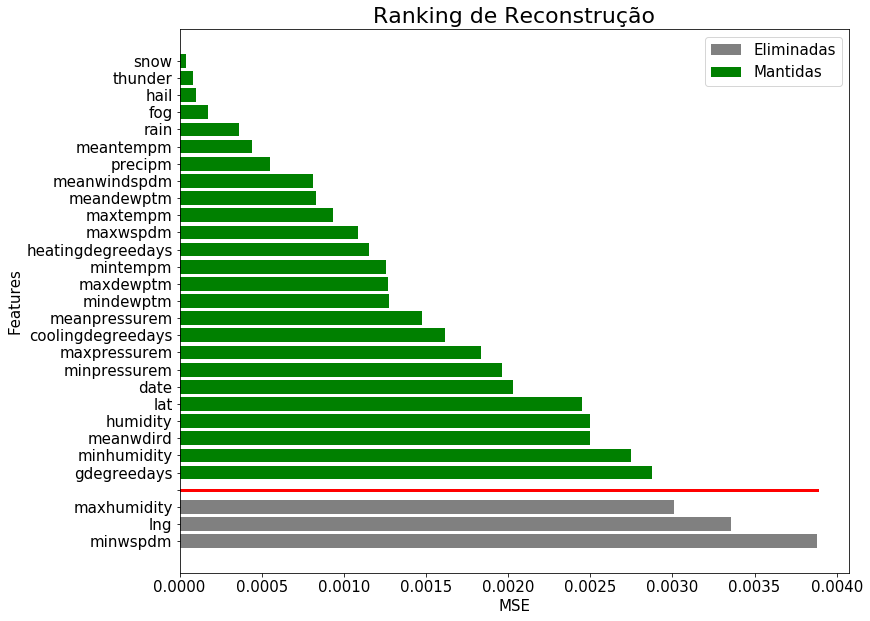

In [43]:
bads = []
values = []
rank = []
rankv = []
# Ranqueia
for b in sorted(score, key = score.get,reverse=True):
    rank.append(b)
    rankv.append(score[b])
    
# Separa as ruins
for a in sorted(score, key = score.get,reverse=True):
    if(score[a] > 0.003):
        print(a,score[a])
        bads.append(a)
        values.append(score[a])
        rank.remove(a)
        rankv.remove(score[a])

# Plota gráfico de barras horizontais
plt.figure(figsize=(12,10))
plt.rc('font', size=15)
plt.rc('axes', titlesize=22)
plt.title(u"Ranking de Reconstrução")
plt.xlabel("MSE")
plt.ylabel("Features")
plt.plot([0,np.max(values)],[len(bads),len(bads)],c='r',linewidth=3)
bads.append('')
values.append(0)
plt.barh(bads,values,color='grey',label='Eliminadas')
plt.barh(rank,rankv,color='green',label='Mantidas')
plt.legend()
plt.show()

In [22]:
bads.remove('')
bads.remove('lng')
for b in bads:
    df_atmes.drop(b,axis=1,inplace=True)
df_atmes.describe()

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,meanpressurem,...,maxtempm,meanwindspdm,maxpressurem,hail,meandewptm,maxwspdm,precipm,meantempm,meanwdird,mintempm
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,...,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000
mean,0.424391,0.313392,0.639710,0.046453,0.005220,0.417656,0.068422,0.625303,0.101475,0.478729,...,0.511441,0.080880,0.491284,0.001203,0.690873,0.102965,0.007375,0.717266,0.384928,0.721173
std,0.130429,0.172311,0.085021,0.207810,0.071755,0.188882,0.151484,0.116721,0.104713,0.126506,...,0.089104,0.047088,0.118210,0.033156,0.119145,0.049627,0.031161,0.099060,0.318295,0.097727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.363636,0.207383,0.620315,0.000000,0.000000,0.270833,0.000000,0.549020,0.000000,0.398776,...,0.455882,0.047619,0.408163,0.000000,0.596154,0.075000,0.000000,0.648148,0.000000,0.655172
50%,0.363636,0.301612,0.627941,0.000000,0.000000,0.406250,0.000000,0.647059,0.078947,0.484754,...,0.514706,0.076190,0.489796,0.000000,0.711538,0.100000,0.000000,0.722222,0.401662,0.724138
75%,0.454545,0.358735,0.651912,0.000000,0.000000,0.541667,0.000000,0.705882,0.157895,0.564095,...,0.573529,0.104762,0.571429,0.000000,0.788462,0.130000,0.000000,0.777778,0.645429,0.793103
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df_atmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 26 columns):
date                 3675 non-null float64
lat                  3675 non-null float64
lng                  3675 non-null float64
thunder              3675 non-null float64
snow                 3675 non-null float64
minhumidity          3675 non-null float64
coolingdegreedays    3675 non-null float64
maxdewptm            3675 non-null float64
heatingdegreedays    3675 non-null float64
meanpressurem        3675 non-null float64
rain                 3675 non-null float64
fog                  3675 non-null float64
humidity             3675 non-null float64
gdegreedays          3675 non-null float64
mindewptm            3675 non-null float64
minpressurem         3675 non-null float64
maxtempm             3675 non-null float64
meanwindspdm         3675 non-null float64
maxpressurem         3675 non-null float64
hail                 3675 non-null float64
meandewptm           3675 non-nul

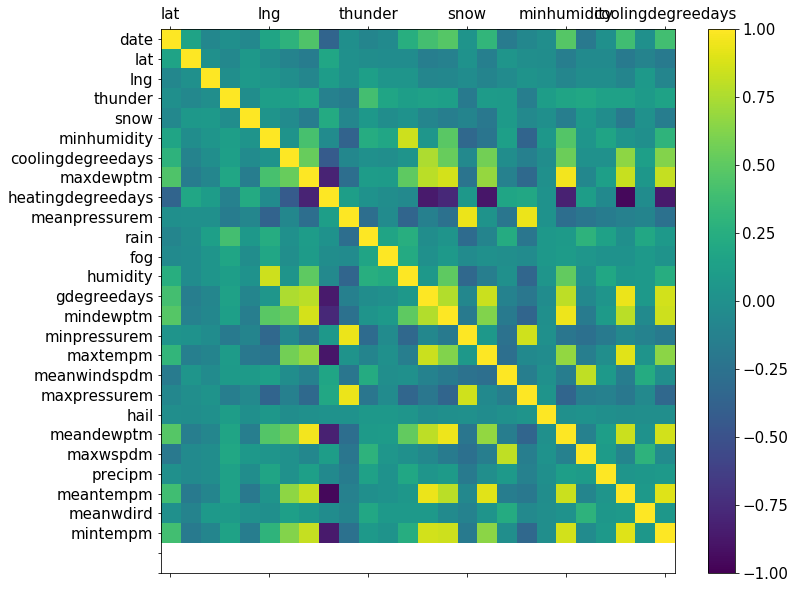

In [24]:
# Plota matriz de correlação
# Quanto mais correlacionadas duas features, mais forte é a cor de interseção entre elas
# crescem justas na mesma direção = bem correlacionadas
# crescem em direções opostas = mal correlacionadas
plt.rc('font', size=15)
plt.rc('axes', titlesize=22)
correlations = df_atmes.corr()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,input_dim,1)
ax.set_yticks(ticks)
ax.set_xticklabels(df_atmes.columns)
ax.set_yticklabels(df_atmes.columns)
plt.show()

## Treinamento de Rede Final com as features selecionadas

In [25]:
input_dim = len(df_atmes.columns)
input_dim

26

In [26]:
# Rede com duas camadas decodificadas e batch_normalizzation e Tanh
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
batch1 = BatchNormalization()(entrada)
encoded1 = Dense(encoding_dim1,activation="tanh")(batch1)
dp2 = Dropout(0.2)(encoded1)
encoded2 = Dense(encoding_dim1,activation="tanh")(dp2)
batch2 = BatchNormalization()(encoded2)
decoded = Dense(input_dim,activation="sigmoid")(batch2)

In [27]:
# Cria o modelo para a rede anteriormente montada
final_autoencoder = Model(entrada,decoded)

In [28]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
final_autoencoder.compile(optimizer='adam', loss='mse')

In [29]:
# Separa as base de treino e teste
X_trainAtMes, X_testAtMes = train_test_split(df_atmes, test_size=0.30, random_state=42)

In [30]:
batch = len(df_atmes)//10
batch
attest_dim = len(X_testAtMes)//10
attest_dim

110

In [31]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)
history = final_autoencoder.fit(X_trainAtMes, X_trainAtMes,
                epochs=3000,
                batch_size=batch,
                shuffle=True,
                validation_data=(X_testAtMes, X_testAtMes),
                callbacks=[es])

Train on 2572 samples, validate on 1103 samples
Epoch 1/3000
2572/2572 [==============================] - 1s 301us/step - loss: 0.1390 - val_loss: 0.1280
Epoch 2/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.1325 - val_loss: 0.1232
Epoch 3/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.1272 - val_loss: 0.1185
Epoch 4/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.1224 - val_loss: 0.1150
Epoch 5/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.1180 - val_loss: 0.1114
Epoch 6/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.1137 - val_loss: 0.1081
Epoch 7/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.1100 - val_loss: 0.1047
Epoch 8/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.1063 - val_loss: 0.1013
Epoch 9/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.1028 - val_loss: 0.0984
Epoch 

2572/2572 [==============================] - 0s 14us/step - loss: 0.0104 - val_loss: 0.0086
Epoch 78/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0103 - val_loss: 0.0085
Epoch 79/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0103 - val_loss: 0.0084
Epoch 80/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0103 - val_loss: 0.0083
Epoch 81/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0101 - val_loss: 0.0082
Epoch 82/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0100 - val_loss: 0.0081
Epoch 83/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0099 - val_loss: 0.0080
Epoch 84/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0098 - val_loss: 0.0079
Epoch 85/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0096 - val_loss: 0.0078
Epoch 86/3000
2572/2572 [==============================] - 0

Epoch 154/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0061 - val_loss: 0.0043
Epoch 155/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0061 - val_loss: 0.0042
Epoch 156/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0062 - val_loss: 0.0042
Epoch 157/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0062 - val_loss: 0.0042
Epoch 158/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0062 - val_loss: 0.0042
Epoch 159/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0061 - val_loss: 0.0041
Epoch 160/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0060 - val_loss: 0.0041
Epoch 161/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0061 - val_loss: 0.0041
Epoch 162/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0061 - val_loss: 0.0041
Epoch 163/3000
2572/2572 [===========

2572/2572 [==============================] - 0s 13us/step - loss: 0.0049 - val_loss: 0.0030
Epoch 231/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0050 - val_loss: 0.0029
Epoch 232/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0050 - val_loss: 0.0030
Epoch 233/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0049 - val_loss: 0.0030
Epoch 234/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0050 - val_loss: 0.0029
Epoch 235/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0050 - val_loss: 0.0029
Epoch 236/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0050 - val_loss: 0.0029
Epoch 237/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0049 - val_loss: 0.0029
Epoch 238/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0050 - val_loss: 0.0029
Epoch 239/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0046 - val_loss: 0.0024
Epoch 307/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 308/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0045 - val_loss: 0.0025
Epoch 309/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 310/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0045 - val_loss: 0.0024
Epoch 311/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0043 - val_loss: 0.0024
Epoch 312/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0043 - val_loss: 0.0024
Epoch 313/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0044 - val_loss: 0.0024
Epoch 314/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0044 - val_loss: 0.0024
Epoch 315/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0042 - val_loss: 0.0023
Epoch 383/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0042 - val_loss: 0.0023
Epoch 384/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0042 - val_loss: 0.0022
Epoch 385/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0041 - val_loss: 0.0022
Epoch 386/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0041 - val_loss: 0.0022
Epoch 387/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0040 - val_loss: 0.0022
Epoch 388/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0042 - val_loss: 0.0022
Epoch 389/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0042 - val_loss: 0.0022
Epoch 390/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0042 - val_loss: 0.0022
Epoch 391/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 459/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0021
Epoch 460/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0041 - val_loss: 0.0021
Epoch 461/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 462/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 463/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 464/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 465/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 466/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 467/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 12us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 535/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 536/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 537/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 538/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 539/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0038 - val_loss: 0.0019
Epoch 540/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0038 - val_loss: 0.0019
Epoch 541/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0038 - val_loss: 0.0019
Epoch 542/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 543/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 611/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 612/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 613/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 614/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 615/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 616/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 617/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 618/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 619/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 12us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 687/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0037 - val_loss: 0.0017
Epoch 688/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 689/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 690/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 691/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 692/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 693/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 694/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 695/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 22us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 763/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 764/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 765/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 766/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 767/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 768/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 769/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 770/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 771/3000
2572/2572 [==========================

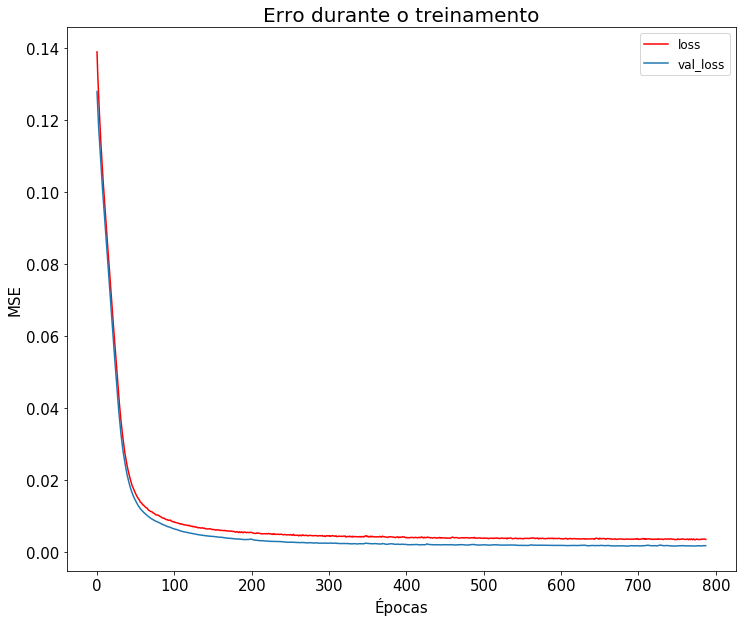

In [32]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=15)
plt.plot(history.history['loss'],color='r',label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Erro durante o treinamento")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [33]:
# Faz a previsão para a base de teste
testeAtMes = final_autoencoder.predict(X_testAtMes)

In [34]:
# Calcula o erro (MSE) para o teste
final_autoencoder.evaluate(x=X_testAtMes, y=X_testAtMes, batch_size=attest_dim)

1103/1103 [==============================] - 0s 20us/step


0.0016632383167473489

In [35]:
# Calcula o erro (MSE) para o treino
final_autoencoder.evaluate(x=X_trainAtMes, y=X_trainAtMes, batch_size=batch)

2572/2572 [==============================] - 0s 9us/step


0.0016841523149088793

# Variational Autoencoder